<a href="https://colab.research.google.com/github/NguyenPhuc213/Ynus213/blob/main/bai1robot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from math import cos, sin
from pandas import DataFrame
import numpy as np
import pandas as pd

theta1 = []
theta2 = []
pi=3.14
px = []
py = []

l1 = 40
l2 = 50
for i1 in range (0,80*10):
    for i2 in range (0,170*10):
        t1 = i1/10
        t2 = i2/10
        theta1.append(t1)
        theta2.append(t2)
        px.append(round(l1*cos(t1*pi/180) + l2*cos((t1+t2)*pi/180),2))
        py.append(round(l1*sin(t1*pi/180) + l2*sin((t1+t2)*pi/180),2))
       
       
df = DataFrame(np.c_[theta1,theta2,px,py],columns = ['theta1','theta2','px','py'])
export_csv = df.to_csv (r'datarobot2.csv', index = None, header=True)

In [ ]:
import sklearn
import matplotlib.pyplot as plt
from keras.utils import np_utils
import keras 
from sklearn.model_selection import train_test_split

url = 'datarobot2.csv'
data = pd.read_csv(url)

dataX = data.drop(data.columns[:2],axis=1)
X = dataX.values.tolist()
dataY = data.drop(data.columns[2:],axis=1)
Y = dataY.values.tolist()
X_train, X_test, Y_train, Y_test = train_test_split(dataX, dataY, test_size = 0.2, random_state=7)

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
X_train = np.array(X_train)
X_test = np.array(X_test)


In [ ]:
#tao model
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(256,kernel_initializer='normal', activation = 'relu', input_shape=(2,)))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='relu'))
model.summary()
model.compile(loss='mse', optimizer=RMSprop(), metrics=['mean_absolute_error'])
history = model.fit( X_train, Y_train, batch_size =28, epochs=5, verbose=1, validation_split=0.2)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               768       
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 2)                 130       
                                                                 
Total params: 107,842
Trainable params: 107,842
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
31086/31086 [=========================

In [ ]:
model.save('model_robot2')

INFO:tensorflow:Assets written to: model_robot2/assets


In [ ]:
score = model.evaluate(X_test,Y_test,verbose=0)
print('sai so kiem tra la:',score[0])
print('do chinh xac kiem tra:',score[1])


sai so kiem tra la: 4.76533842086792
do chinh xac kiem tra: 1.4250117540359497


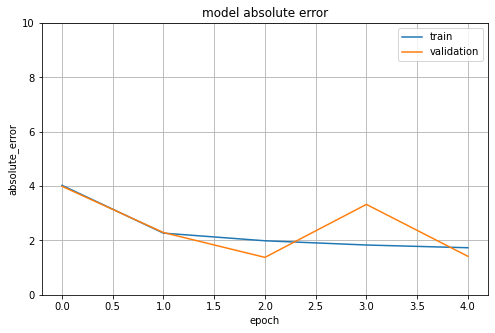

In [ ]:
#dothi
plt.figure(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,10)

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

plt.title('model absolute error')
plt.ylabel('absolute_error')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')

plt.show()